In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from scipy import integrate

[[0.01086809 0.01811385 0.0253596  0.03260535]
 [0.00757103 0.01261838 0.01766574 0.02271309]
 [0.00465215 0.00775358 0.01085502 0.01395645]
 [0.00243426 0.00405709 0.00567993 0.00730277]]


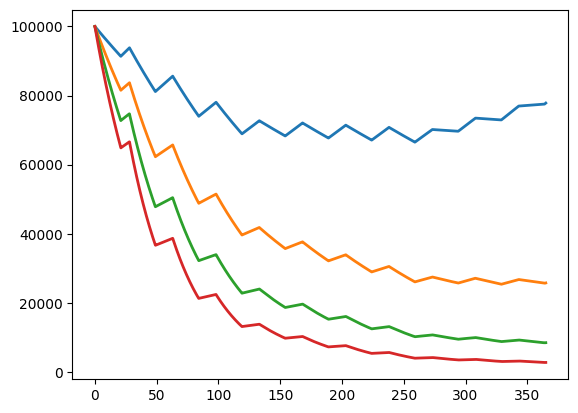

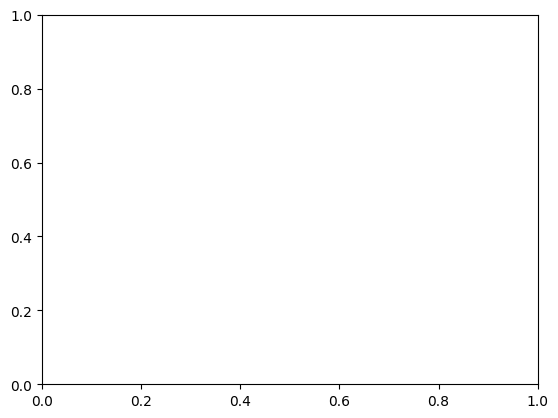

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate


def event(t, C, g, a, S, drug_matrix):
    return t - drug_matrix[-1,-1]


def tumour_growth(C0, T, D, a=300., S=(0.02173619,0.01514206,0.0093043,0.00486851), TD=180.):
    """
    :param c0: Initial tumour value
    :param T: End of simulation time
    :param D: drug matrix
    drug matrix
    np.array([
    ["d1", dose1, t1_start, t1_end]
    ["d1", dose2, t2_start, t2_end]
    ["d1", dose3, t3_start, t3_end]
    ...
    ["d2", dose1, t1_start, t1_end]
    ["d2", dose2, t2_start, t2_end]
    ["d2", dose3, t3_start, t3_end]
    ...
    ...
    ["d4", dose1, t1_start, t1_end]
    ["d4", dose2, t2_start, t2_end]
    ["d4", dose3, t3_start, t3_end]
    ])
    :param a: Allee shape parameter
    :param S: patient specific sensitivity values
    :param TD: tumour doubling time
    :return: C(t) cancer volume as function of time
    """
    g = np.log(2) / TD

    sol = integrate.solve_ivp(ode, t_span=(0, T), y0=(C0,), args=(g, a, S, D,), max_step=0.1,
                              method='LSODA')

    return sol

def ode(t, C, g, a, S, drug_matrix):
    s1, s2, s3, s4 = S

    d1 = drug_matrix[np.where(drug_matrix[:, 0] == 1.), 1:4][0]
    d2 = drug_matrix[np.where(drug_matrix[:, 0] == 2.), 1:4][0]
    d3 = drug_matrix[np.where(drug_matrix[:, 0] == 3.), 1:4][0]
    d4 = drug_matrix[np.where(drug_matrix[:, 0] == 4.), 1:4][0]

    h1 = d1[np.where((d1[:, 1] < t) & (t < d1[:, 2])), 0]
    if h1.size==0:
        h1 = 0.0

    h2 = d2[np.where((d2[:, 1] < t) & (t < d2[:, 2])), 0]
    if h2.size==0:
        h2 = 0.0

    h3 = d3[np.where((d3[:, 1] < t) & (t < d3[:, 2])), 0]
    if h3.size==0:
        h3 = 0.0

    h4 = d4[np.where((d4[:, 1] < t) & (t < d4[:, 2])), 0]
    if h4.size==0:
        h4 = 0.0


    return (g * np.square(C)) / (a + C) - s1 * h1 * C - s2 * h2 * C - s3 * h3 * C - s4 * h4 * C


def plot_solution(solution):
#    fig, ax = plt.subplots(figsize=(4, 3))
#    ax.set_xlabel("$t$")
#    ax.set_ylabel("c(t)")
    plt.plot(solution.t, solution.y.T[:, 0], lw=2);


def final_tumour_volume(solution):
    return solution.y.T[:, 0][-1]


def tumour_end_of_treatment(solution):
    return solution.y_events[0].flatten()[0]



#drug_matrix = np.array([
 #   [1.0, 0.5, 1., 2.],
 #   [1.0, 0.3, 5., 9.],
 #   [1.0, 0.7, 10., 15.],
 #   [1.0, 0.1, 20., 25.],
 #   [2.0, 0.9, 2., 20.],
 #   [2.0, 0.9, 10., 20.],
 #   [3.0, 0.8, 30., 40.],
 #   [4.0, 0.8, 70., 80.],
 #   ], dtype=object)

#drug_matrix = np.array([
#    [1.0, 0.0, 0., 2.],
#    [1.0, 0.0, 5., 9.],
#    [1.0, 0.0, 10., 15.],
#    [1.0, 1.0, 20., 30.],
#    [2.0, 1.0, 2., 20.],
#    [2.0, 0.75, 100., 120.],
#    [3.0, 1.0, 30., 40.],
#    [4.0, 1.0, 70., 80.],
#    ], dtype=object)

drug_matrix = np.array([[  1.  ,   0.75,   0.  ,  21.  ],
        [  1.  ,   0.99,  28.  ,  49.  ],
        [  1.  ,   0.99,  63.  ,  84.  ],
        [  1.  ,   0.90,  98.  , 119.  ],
        #[  1.  ,   0.90,  120.  , 400.  ],
        [  2.  ,   0.90, 133.  , 154.  ],
        [  2.  ,   0.90, 168.  , 189.  ],
        [  2.  ,   0.90, 203.  , 224.  ],
        [  2.  ,   0.90, 238.  , 259.  ],
        [  3.  ,   0.90, 273.  , 294.  ],
        [  3.  ,   0.90, 308.  , 329.  ],
        [  3.  ,   0.75, 343.  , 364.  ],
        [  3.  ,   0.75, 378.  , 399.  ],
        [  3.  ,   0.75, 413.  , 434.  ],
        [  4.  ,   0.99, 448.  , 476.  ],
        [  4.  ,   0.99, 490.  , 518.  ],
        [  4.  ,   0.99, 532.  , 570.  ],
        [  4.  ,   0.99, 574.  , 612.  ],
        [  4.  ,   0.99, 616.  , 644.  ]])



treatment_switch_times = np.array([100.,200.,365.])
treatment_array = np.zeros((treatment_switch_times.shape[0],4))
sol_arr = np.zeros(3651)
#initially estimated drug sensitivity parameter values are used to generate a
#vector of parameter values that we want to check
S=(0.02173619,0.01514206,0.0093043,0.00486851)
t_0=0

#s1=np.sort(np.random.gamma(2,2.173619/2,10)*1e-2)

s1=np.linspace(0.02173619/2,0.0217369*1.5,4)
#s2=np.sort(np.random.gamma(2,1.514206/2,10)*1e-2)
s2=np.linspace(0.01514206/2,0.01514206*1.5,4)

#s3=np.sort(np.random.gamma(2,9.3043/2,10)*1e-3)
s3=np.linspace(0.0093043/2,0.0093043*1.5,4)
#s4=np.sort(np.random.gamma(2,3.850818/2,10)*1e-3)
s4=np.linspace(0.00486851/2,0.00486851*1.5,4)
S_matrix=np.array([s1,s2,s3,s4])
#print(S_matrix)
#use the following loop for parameter sensitivity. We may also test growth rate and allee parameter.
for i in range(0,S_matrix.shape[1]):
    S_i=tuple(S_matrix[0:4,i])
   # print(S_i)
   # print(i)
    sol_arr_i=[]
    for switch_time in treatment_switch_times:
      sol = tumour_growth(np.power(10,5),365,drug_matrix,a=300,S=S_i,TD=180.)

      sol_arr_i=np.append(sol_arr_i,sol.y)
      #print(np.shape(sol.y))

      t0 = switch_time

      #plot_solution(sol)
      #plt.show()
    #np.vstack((sol_arr,sol_arr_i))
    plot_solution(sol)

#print(sol_arr)

fig,ax=plt.subplots()



print(S_matrix)

plt.show()


#print(np.shape(sol_arr))
      #plot_solution(sol.arr)
      #plt.show()